# 311 Exploratory Data Analysis

While we wait to 

In [21]:
import pandas as pd
import json
import requests
import datetime

import matplotlib.pyplot as plt

In [5]:
# This datasource has about 920000 records but the Socrata API limits calls at 50,000 records
# We can download a csv file (which is too large for github to publish) or can build a system to page through records if we need to use the api later
# For now we look just at "Other" type requests and use the largest limit to see how many records we find.
# Details about queries and limits can be found here: https://dev.socrata.com/consumers/getting-started.html#:~:text=Paging,of%2050%2C000%20records%20per%20page.

url = 'https://data.lacity.org/resource/ndkd-k878.json?requesttype=Other&$limit=50000' #create the api link

file = requests.get(url) # make the request

In [6]:
df = pd.read_json(file.text) #Read the response object to a dataframe
df.head()

,location,zipcode,suffix,srnumber,updateddate,closeddate,cd,address,createddate,requestsource,...,tbmrow,direction,anonymous,addressverified,actiontaken,streetname,ncname,apc,tbmpage,assignto
0,"{'latitude': '34.0788821043', 'human_address':...",90004.0,AVE,1-411045061,2017-01-10T10:23:00.000,2017-01-10T10:23:00.000,13.0,"4160 W ROSEWOOD AVE, 90004",2016-12-31T19:33:00.000,Mobile App,...,7.0,W,N,Y,SR Created,ROSEWOOD,WILSHIRE CENTER - KOREATOWN NC,Central APC,594.0,NaN
1,"{'latitude': '34.0690071622', 'human_address':...",90020.0,NaN,1-411042033,2017-01-10T10:27:00.000,2017-01-10T10:27:00.000,10.0,"3RD ST AT NORMANDIE AVE, 90020",2016-12-31T18:58:00.000,Mobile App,...,1.0,NaN,Y,Y,SR Created,NaN,WILSHIRE CENTER - KOREATOWN NC,Central APC,633.0,NaN
2,"{'latitude': '34.0579703127', 'human_address':...",90025.0,BLVD,1-410981641,2016-12-31T15:24:00.000,2016-12-31T15:24:00.000,5.0,"10350 W SANTA MONICA BLVD, 90025",2016-12-31T15:02:00.000,Mobile App,...,3.0,W,N,Y,SR Created,SANTA MONICA,WESTSIDE NC,West Los Angeles APC,632.0,NaN
3,"{'latitude': '34.0943664515', 'human_address':...",90069.0,DR,1-410948541,2016-12-31T14:34:00.000,2016-12-31T14:34:00.000,4.0,"8711 W ST IVES DR, 90069",2016-12-31T14:13:00.000,Self Service,...,5.0,W,N,Y,SR Created,ST IVES,BEL AIR-BEVERLY CREST NC,Central APC,592.0,NaN
4,"{'latitude': '34.1908217122', 'human_address':...",91303.0,ST,1-410922294,2016-12-31T14:06:00.000,2016-12-31T14:06:00.000,3.0,"22315 W CRISWELL ST, 91303",2016-12-31T13:40:00.000,Mobile App,...,6.0,W,N,Y,SR Created,CRISWELL,WOODLAND HILLS-WARNER CENTER NC,South Valley APC,529.0,NaN


In [20]:
df.shape # Check length of the data

(15497, 31)

There are only 15,000 records in this 2016 311 call data with the "Other" type to look at, so we don't need to wory to much about paging through the data

In [12]:
df['createddate'] = pd.to_datetime(df['createddate'], infer_datetime_format=True) # read the created date field to a datetime object
df.set_index('createddate', inplace=True) # set this column to the index to ease plotting and grouping operations.

Text(0.5, 1.0, 'Daily 311 Calls: 2016')

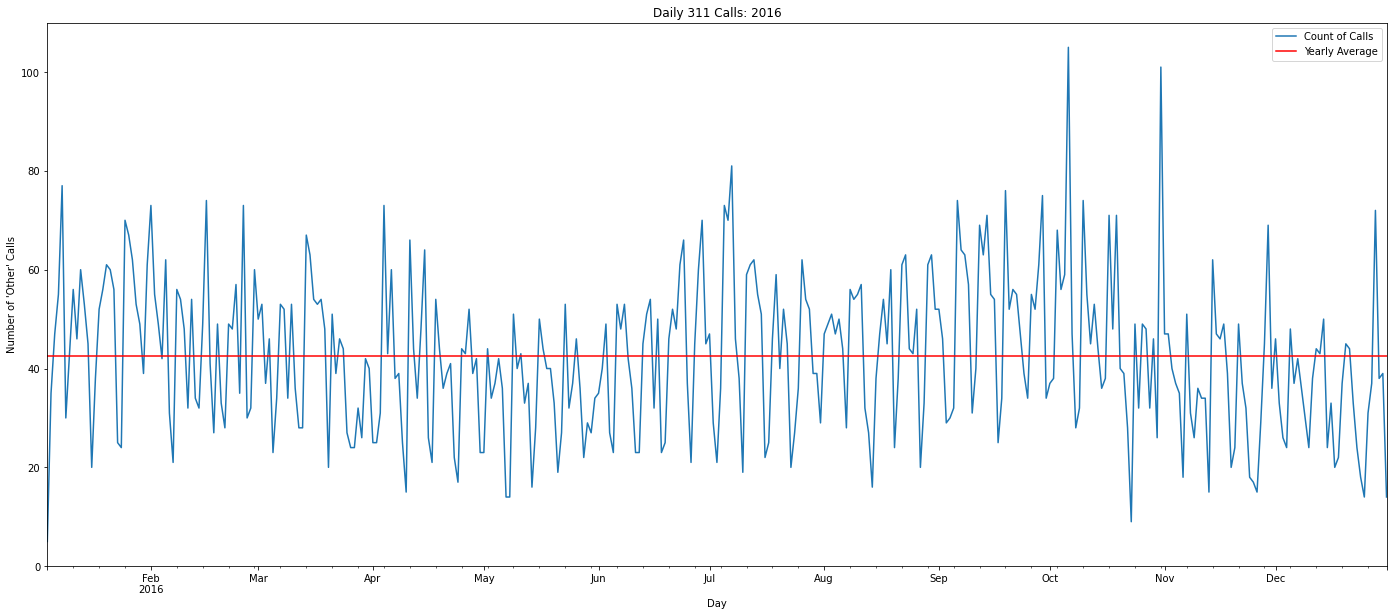

In [31]:
### Plot a graph with the daily calls throughout the year and the yearly daily average of calls to compare to.

fig, ax = plt.subplots(figsize=(24,10))
df.groupby(df.index.floor('d')).count()['zipcode'].plot(kind='line', ax=ax, label='Count of Calls') # return the count of records for each date, limit to one column, and plot on a line graph.
plt.axhline(y=df.groupby(df.index.floor('d')).count()['zipcode'].mean(), color='red', label='Yearly Average') # Plot line of the daily average for the year. 

labels = ['Count of Calls', 'Yearly Average']
plt.legend(labels=labels)

plt.xlabel('Day')
plt.ylabel("Number of 'Other' Calls")
plt.title('Daily 311 Calls: 2016')